# Exploring the functionality within the `romeo.LogisticRegression` class

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import log_loss, roc_curve, roc_auc_score, confusion_matrix
import session_info

pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
current_wd = os.getcwd()
os.chdir(current_wd.split("/notebook")[0])
from romeo.logistic_model import LogisticRegression
os.chdir(current_wd)

In [3]:
session_info.show(write_req_file=False)

## Make X and y data

In [4]:
amount_of_features = 10
amount_informative = 2
X, y = make_classification(n_samples=300,
    n_features=amount_of_features,
    n_informative=amount_informative,
#                              noise=5,
#                              coef=True, 
                            random_state=42)

In [5]:
X = X + 100

## Fit the model

In [6]:
df = (pd.DataFrame(X, columns=[f"feat_{x}" for x in range(0, X.shape[1])])
.merge(pd.DataFrame(y, columns=["target"]),
      left_index=True,
      right_index=True))

In [7]:
df.head()

,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,target
0,99.975,101.452,98.797,101.248,99.492,100.923,100.300,99.547,99.852,100.327,1
1,100.750,100.098,100.664,99.320,100.254,99.661,99.608,101.086,100.468,100.308,0
2,98.764,99.161,99.097,100.922,100.538,100.411,98.034,99.635,101.073,98.955,1
3,98.385,99.244,99.278,100.729,99.332,100.183,99.102,99.825,100.992,100.537,1
4,99.276,100.633,100.952,99.003,99.168,99.097,98.484,99.448,100.471,100.203,0


In [8]:
df_train = df.sample(frac=0.8, random_state=69420)
df_test = df.drop(df_train.index)

In [9]:
df_train.shape, df_test.shape

((240, 11), (60, 11))

## Fit the romeo LogisticRegression

In [10]:
reg = LogisticRegression(fit_intercept=True,
                      normalize=True).fit(X=df_train.filter(regex="feat"), 
                                               y=df_train["target"], 
                                               verbose=False)

In [11]:
reg.intercept_, reg.coef_ 

(-0.009486998010060557,
 array([ 0.44877268,  0.29063418, -2.60723345,  0.78924118, -0.05891131,
         0.65626744, -0.18602836,  0.37232276,  0.27458288,  0.01928333]))

In [12]:
reg.summary_.round(3)
#reg.score(X, y)

,coef,std_err,t,P>|t|,[0.025,0.975]
intercept,-0.009,86999257.270,-0.000,1.000,-171421360.200,171421360.181
feat_0,0.449,515947.708,0.000,1.000,-1016611.194,1016612.092
feat_1,0.291,6.424,0.045,0.964,-12.368,12.949
feat_2,-2.607,472793.358,-0.000,1.000,-931583.900,931578.686
feat_3,0.789,1312309.723,0.000,1.000,-2585744.478,2585746.057
feat_4,-0.059,6.992,-0.008,0.993,-13.836,13.718
feat_5,0.656,2298827.798,0.000,1.000,-4529557.416,4529558.728
feat_6,-0.186,6.717,-0.028,0.978,-13.420,13.048
feat_7,0.372,7.269,0.051,0.959,-13.950,14.695
feat_8,0.275,6.997,0.039,0.969,-13.511,14.060


In [13]:
# reg.fit_evaluation_.round(3)

## Show the available methods and attributes of the fitted model

In [14]:
np.array(dir(reg))

array(['__class__', '__delattr__', '__dict__', '__dir__', '__doc__',
       '__eq__', '__format__', '__ge__', '__getattribute__',
       '__getstate__', '__gt__', '__hash__', '__init__',
       '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__',
       '__new__', '__reduce__', '__reduce_ex__', '__repr__',
       '__setattr__', '__setstate__', '__sizeof__', '__str__',
       '__subclasshook__', '__weakref__', '_check_n_features',
       '_estimator_type', '_get_param_names', '_get_tags', '_more_tags',
       '_repr_html_', '_repr_html_inner', '_repr_mimebundle_',
       '_validate_data', 'aic', 'bic', 'bse', 'coef_', 'conf_int',
       'copy_X', 'cost', 'df_model', 'df_resid', 'ess', 'f_pvalue', 'fit',
       'fit_intercept', 'fvalue', 'get_params', 'intercept_',
       'is_fitted_', 'loglike', 'mse_model', 'mse_resid', 'mse_total',
       'normalize', 'params', 'positive', 'predict', 'predictors',
       'pvalues', 'resid', 'rsquared', 'rsquared_adj', 'score',
       'set_

In [15]:
# reg.conf_int()

In [16]:
reg.df_resid

229

In [17]:
intercept = reg.intercept_
coefs = reg.coef_

In [18]:
coefs

array([ 0.44877268,  0.29063418, -2.60723345,  0.78924118, -0.05891131,
        0.65626744, -0.18602836,  0.37232276,  0.27458288,  0.01928333])

In [19]:
coefs.reshape(1,-1)

array([[ 0.44877268,  0.29063418, -2.60723345,  0.78924118, -0.05891131,
         0.65626744, -0.18602836,  0.37232276,  0.27458288,  0.01928333]])

In [20]:
coefs*df_train.filter(regex="feat").head()

,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9
110,44.382,29.026,-258.761,79.530,-5.928,65.840,-18.575,37.163,27.572,1.929
139,44.859,29.094,-256.394,80.284,-6.008,66.462,-18.355,37.834,27.029,1.911
21,44.541,28.692,-262.151,78.468,-5.916,65.235,-18.799,37.333,27.515,1.907
86,45.809,29.033,-266.769,77.045,-5.819,64.768,-18.323,37.059,27.595,1.979
81,45.372,29.040,-258.117,79.753,-5.786,66.301,-18.512,37.045,27.546,1.935


In [21]:
tmp_x = df_train.filter(regex="feat").assign(intercept=1).set_index("intercept").reset_index().values

In [22]:
tmp_x = reg.intercept_ * tmp_x

In [23]:
# np.linalg.inv(np.dot(tmp_x.T, tmp_x))

In [24]:
cov_mat = np.linalg.inv(np.matmul(tmp_x.transpose(1,0), tmp_x))

In [25]:
# abs(cov_mat)

In [26]:
# np.sqrt(np.diag(abs(cov_mat)))

In [27]:
# pd.DataFrame(np.cov(tmp_x))

In [28]:
# Statsmodels cov_params
"""
Notes
-----
(The below are assumed to be in matrix notation.)
If no argument is specified returns the covariance matrix of a model
``(scale)*(X.T X)^(-1)``
If contrast is specified it pre and post-multiplies as follows
``(scale) * r_matrix (X.T X)^(-1) r_matrix.T``
If contrast and other are specified returns
``(scale) * r_matrix (X.T X)^(-1) other.T``
If column is specified returns
``(scale) * (X.T X)^(-1)[column,column]`` if column is 0d
OR
``(scale) * (X.T X)^(-1)[column][:,column]`` if column is 1d
"""

'\nNotes\n-----\n(The below are assumed to be in matrix notation.)\nIf no argument is specified returns the covariance matrix of a model\n``(scale)*(X.T X)^(-1)``\nIf contrast is specified it pre and post-multiplies as follows\n``(scale) * r_matrix (X.T X)^(-1) r_matrix.T``\nIf contrast and other are specified returns\n``(scale) * r_matrix (X.T X)^(-1) other.T``\nIf column is specified returns\n``(scale) * (X.T X)^(-1)[column,column]`` if column is 0d\nOR\n``(scale) * (X.T X)^(-1)[column][:,column]`` if column is 1d\n'

## Plot the original data and the lines of best fit for each of the predictors on the target

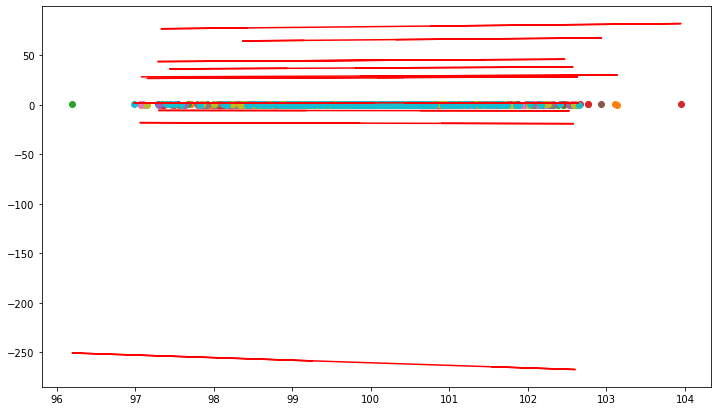

In [29]:
_ = plt.figure(figsize=(12, 7))
_ = plt.plot(df_train.filter(regex="feat"), 
             df_train["target"], 
             'o', 
             label='original data')
_ = plt.plot(df_train.filter(regex="feat"), 
             intercept + coefs*df_train.filter(regex="feat"), 
             'r', 
             label='fitted line')
# _ = plt.legend()

## With the fitted model attempt to predict the test data

In [30]:
y_pred = reg.predict(df_test.filter(regex="feat"))
y_pred.head(2)

,y_pred
9,0.990
37,0.932


In [31]:
y_test = df_test[["target"]]
y_test.head(2)

,target
9,1
37,1


## Calculate the Log loss between the predicted vs the real scores

In [32]:
log_loss_score = log_loss(y_test["target"], 
        y_pred)
log_loss_score

0.17199985204331758

## Plot the predicted vs the real values

In [33]:
c_mat = confusion_matrix(y_test["target"], y_pred.round(0))

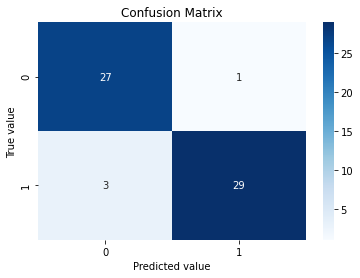

In [34]:
cmap='Blues'
categories=["0", "1"]

_ = sns.heatmap(c_mat, 
                annot=True,            
#                 fmt="",
                cmap=cmap,
#                 cbar=cbar,
                xticklabels=categories,
                yticklabels=categories
               )
_ = plt.title("Confusion Matrix")
# _ = plt.xlabel(f'Predicted value\n\nAccuracy={summary_df["Accuracy"].values[0]}\nSensitivity={summary_df["Sensitivity"].values[0]}\nSpecificity={summary_df["Specificity"].values[0]}\nF1 Score={summary_df["F1"].values[0]}')
_ = plt.xlabel(f'Predicted value')
_ = plt.ylabel("True value")

In [35]:
# _ = plt.figure(figsize=(12, 7))
# _ = plt.plot(y_test["target"], 
#              y_pred, 
#              'o', 
# #              label='original data'
#             )
# _ = plt.annotate(text = f"Log Loss = {round(log_loss, 5)}",
#                  xy=(0.9, 0.1),)

In [36]:
fpr, tpr, thresh = roc_curve(y_true=y_test["target"], y_score=y_pred, pos_label=1, sample_weight=None, drop_intermediate=False)

In [37]:
auc_score = roc_auc_score(y_true=y_test["target"], y_score=y_pred)

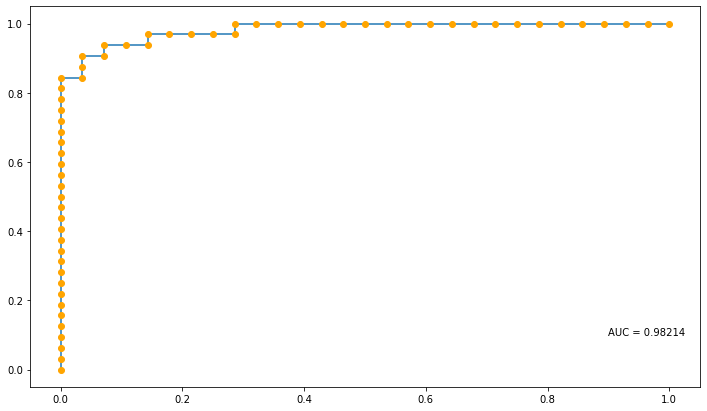

In [38]:
_ = plt.figure(figsize=(12, 7))
_ = plt.plot(fpr, 
             tpr, 
#              'o', 
            )
_ = plt.plot(fpr, 
             tpr, 
             'o',
             c="orange"
            )

_ = plt.annotate(text = f"AUC = {round(auc_score, 5)}",
                 xy=(0.9, 0.1),)

# Statsmodels

In [39]:
import statsmodels
# from statsmodels.regression.linear_model import OLS
from statsmodels.discrete.discrete_model import Logit
from scipy import stats

In [40]:
# df_train["target"]
# statsmodels.tools.tools.add_constant(data=df_train.filter(regex="feat"), prepend=True, has_constant='skip')

In [41]:
res = Logit(endog=df_train["target"], exog=statsmodels.tools.tools.add_constant(data=df_train.filter(regex="feat"), prepend=True, has_constant='skip')).fit()
# res = Logit(endog=df_train["target"], exog=df_train.filter(regex="feat"), prepend=True, has_constant='skip').fit()

         Current function value: 0.202515
         Iterations: 35


/home/james/miniconda3/envs/romeo/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [42]:
coefs

array([ 0.44877268,  0.29063418, -2.60723345,  0.78924118, -0.05891131,
        0.65626744, -0.18602836,  0.37232276,  0.27458288,  0.01928333])

In [43]:
res.params

const    -0.009
feat_0    0.447
feat_1    0.291
feat_2   -2.607
feat_3    0.783
feat_4   -0.059
feat_5    0.664
feat_6   -0.186
feat_7    0.372
feat_8    0.275
feat_9    0.019
dtype: float64

In [44]:
# def bse(self):
#         return np.sqrt(np.diag(self.cov_params()))

In [45]:
np.round(res.bse, 3)

const    16774017.636
feat_0            nan
feat_1          0.247
feat_2      84738.963
feat_3            nan
feat_4          0.284
feat_5            nan
feat_6          0.251
feat_7          0.279
feat_8          0.282
feat_9          0.270
dtype: float64

In [46]:
np.sqrt(np.diag(res.cov_params()))

<ipython-input-46-0685d80d6a9e>:1: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(np.diag(res.cov_params()))


array([1.67740176e+07,            nan, 2.47022201e-01, 8.47389631e+04,
                  nan, 2.83841003e-01,            nan, 2.50697046e-01,
       2.79056252e-01, 2.82203219e-01, 2.70244275e-01])

In [47]:
res.cov_params()

,const,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9
const,281367667666363.656,109231112445.115,-24.340,-1434461235377.591,-1074209495299.173,0.180,-414237058396.463,4.954,2.346,-15.490,-3.144
feat_0,434892109605.900,-1058907652.222,-0.091,-2309910586.602,-5852561456.047,0.006,4872458598.989,-0.011,-0.076,-0.043,0.038
feat_1,-4.855,-0.066,0.061,-0.032,-0.221,0.007,0.291,0.003,0.004,0.001,-0.001
feat_2,-1409857710419.801,-640082810.712,0.066,7180691860.447,5065854446.743,-0.038,2492113607.848,-0.047,-0.101,0.029,-0.036
feat_3,37788768745.755,-4177553994.337,-0.208,-509374137.534,-14458990484.490,-0.020,18768030929.525,-0.081,-0.332,-0.070,0.091
feat_4,-2.248,-0.017,0.007,-0.027,-0.084,0.081,0.069,-0.012,0.002,-0.002,0.007
feat_5,-1876499844576.978,4784233332.969,0.402,9983205217.679,25987792447.400,-0.032,-21990232553.051,0.031,0.369,0.155,-0.154
feat_6,8.209,-0.017,0.003,-0.064,-0.117,-0.012,0.058,0.063,0.004,-0.001,0.001
feat_7,19.888,-0.081,0.004,-0.191,-0.440,0.002,0.397,0.004,0.078,0.010,0.018
feat_8,-18.774,0.003,0.001,0.049,0.106,-0.002,-0.054,-0.001,0.010,0.080,-0.004


In [48]:
np.array(dir(res))

array(['__class__', '__delattr__', '__dict__', '__dir__', '__doc__',
       '__eq__', '__format__', '__ge__', '__getattribute__',
       '__getstate__', '__gt__', '__hash__', '__init__',
       '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__',
       '__new__', '__reduce__', '__reduce_ex__', '__repr__',
       '__setattr__', '__sizeof__', '__str__', '__subclasshook__',
       '__weakref__', '_cache', '_data_attr', '_data_in_cache',
       '_get_endog_name', '_get_robustcov_results', '_use_t', 'aic',
       'bic', 'bse', 'conf_int', 'cov_kwds', 'cov_params', 'cov_type',
       'df_model', 'df_resid', 'f_test', 'fittedvalues', 'get_margeff',
       'initialize', 'k_constant', 'llf', 'llnull', 'llr', 'llr_pvalue',
       'load', 'mle_retvals', 'mle_settings', 'model', 'nobs',
       'normalized_cov_params', 'params', 'pred_table', 'predict',
       'prsquared', 'pvalues', 'remove_data', 'resid_dev',
       'resid_generalized', 'resid_pearson', 'resid_response', 'save',
    

In [49]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                  240
Model:                          Logit   Df Residuals:                      229
Method:                           MLE   Df Model:                           10
Date:                Thu, 05 Aug 2021   Pseudo R-squ.:                  0.7078
Time:                        12:55:43   Log-Likelihood:                -48.604
converged:                      False   LL-Null:                       -166.35
Covariance Type:            nonrobust   LLR p-value:                 6.068e-45
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0092   1.68e+07  -5.46e-10      1.000   -3.29e+07    3.29e+07
feat_0         0.4471        nan        nan        nan         nan         nan
feat_1         0.2906      0.247      1.177      0.239      -0.194       0.775
feat_2        -2.6074   8.47e+04  -3.08e-05      1.000   -1.66e+05    1.66e+05
feat_3         0.7834        nan        nan        nan         nan         nan
feat_4        -0.0589      0.284     -0.208      0.836      -0.615       0.497
feat_5         0.6640        nan        nan        nan         nan         nan
feat_6        -0.1860      0.251     -0.742      0.458      -0.677       0.305
feat_7         0.3723      0.279      1.334      0.182      -0.175       0.919
feat_8         0.2746      0.282      0.973      0.331      -0.279       0.828
feat_9         0.0193      0.270      0.071      0.943      -0.510       0.549
==============================================================================
"""

In [50]:
reg.summary_.round(3)

,coef,std_err,t,P>|t|,[0.025,0.975]
intercept,-0.009,86999257.270,-0.000,1.000,-171421360.200,171421360.181
feat_0,0.449,515947.708,0.000,1.000,-1016611.194,1016612.092
feat_1,0.291,6.424,0.045,0.964,-12.368,12.949
feat_2,-2.607,472793.358,-0.000,1.000,-931583.900,931578.686
feat_3,0.789,1312309.723,0.000,1.000,-2585744.478,2585746.057
feat_4,-0.059,6.992,-0.008,0.993,-13.836,13.718
feat_5,0.656,2298827.798,0.000,1.000,-4529557.416,4529558.728
feat_6,-0.186,6.717,-0.028,0.978,-13.420,13.048
feat_7,0.372,7.269,0.051,0.959,-13.950,14.695
feat_8,0.275,6.997,0.039,0.969,-13.511,14.060


In [51]:
y_pred = res.predict(exog=df_test.filter(regex="feat"))

ValueError: shapes (60,10) and (11,) not aligned: 10 (dim 1) != 11 (dim 0)

## Plot the predicted vs the real values

In [ ]:
c_mat = confusion_matrix(y_test["target"], y_pred.round(0),)

In [ ]:
cmap='Blues'
categories=["0", "1"]

_ = sns.heatmap(c_mat, 
                annot=True,            
#                 fmt="",
                cmap=cmap,
#                 cbar=cbar,
                xticklabels=categories,
                yticklabels=categories
               )
_ = plt.title("Confusion Matrix")
# _ = plt.xlabel(f'Predicted value\n\nAccuracy={summary_df["Accuracy"].values[0]}\nSensitivity={summary_df["Sensitivity"].values[0]}\nSpecificity={summary_df["Specificity"].values[0]}\nF1 Score={summary_df["F1"].values[0]}')
_ = plt.xlabel(f'Predicted value')
_ = plt.ylabel("True value")

In [ ]:
log_loss_score = log_loss(y_test["target"], 
        y_pred)
log_loss_score

In [ ]:
# _ = plt.figure(figsize=(12, 7))
# _ = plt.plot(y_test["target"], 
#              y_pred, 
#              'o', 
# #              label='original data'
#             )
# _ = plt.annotate(text = f"Log Loss = {round(log_loss, 5)}",
#                  xy=(0.9, 0.1),)

In [ ]:
fpr, tpr, thresh = roc_curve(y_true=y_test["target"], y_score=y_pred, pos_label=1, sample_weight=None, drop_intermediate=False)

In [ ]:
auc_score = roc_auc_score(y_true=y_test["target"], y_score=y_pred)

In [ ]:
_ = plt.figure(figsize=(12, 7))
_ = plt.plot(fpr, 
             tpr, 
#              'o', 
            )
_ = plt.plot(fpr, 
             tpr, 
             'o',
             c="orange"
            )

_ = plt.annotate(text = f"AUC = {round(auc_score, 5)}",
                 xy=(0.9, 0.1),)

In [ ]:
reg.fit_evaluation_.round(4)

In [ ]:
stop!

In [ ]:
res.llf

In [ ]:
res.params / res.bse

In [ ]:
res.tvalues

In [ ]:
res.pvalues

In [ ]:
res.df_resid

In [ ]:
stats.t.sf(np.abs(res.tvalues), res.df_resid) * 2

In [ ]:
type(res.summary())

In [ ]:
res.conf_int()

In [ ]:
res.rsquared

In [ ]:
res.ssr

In [ ]:
res.resid

In [ ]:
reg.resid